In [43]:
## Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as linalg
from sklearn import linear_model
from matplotlib import cm

In [44]:
## Functions

## Cholesky equation solver
def Cholesky_solver(M, b):
    c, low = linalg.cho_factor(M)
    return (linalg.cho_solve((c, low), b))

## For solving linear equation
def linear_eqn_solver(m, X, c):
    return (np.dot(X, m) + c)
    
## Main linear regression
def lin_reg(x, y, test):
    
    ## Build matrix X
    x = np.array(x)
    y = np.array(y)
    x_of1 = np.ones((x.shape[0], 1))
    X = np.hstack((x_of1, x))
    
    ## b <-- X.T y
    b = np.dot(X.T, y)
    
    ## A <-- X.T X
    A = np.dot(X.T, X)
    
    ## Solve AB = b using Cholesky factorization
    B_hat = Cholesky_solver(A, b)
    
    ## Predict
    lin_reg_pred = linear_eqn_solver(B_hat[1:], test, B_hat[0])
    
    return lin_reg_pred, B_hat

In [71]:
def J(x, y, test):
    x = np.array(x)
    y = np.array(y)
    x_of1 = np.ones((x.shape[0], 1))
    X = np.hstack((x_of1, x))

    nabla_B = lin_reg(x, y, test)[1]
    output = -2*(np.dot(X.T, (y-np.dot(X,nabla_B))))
    return (output)
    
def minibatch_gradient_descent(x, y, test, initial_guess, batch_size, learning_rate, tolerance):
    n = 0
    w_n = initial_guess
    print(J(x,y,test))
    while(np.linalg.norm(J(x, y, test)) < tolerance):
        pass

[-1.44328993e-15  6.66133815e-16]


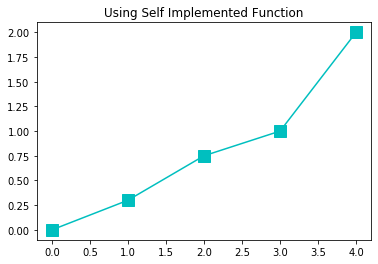

In [72]:
X = [[0], [1], [2], [3], [4]]
y = [0, 0.3, 0.75, 1, 2]

# y = [0,1,2,3,4]

test = np.array([3])
test = test.reshape(-1, 1)

print(J(X,y,test))

plt.plot(X, y, color = 'c')
plt.plot(X,y, 'rs', color = 'c', markersize=12, label="trainin set")
plt.title("Using Self Implemented Function")
plt.show()